# Assignment 1
## Name : Avadhut Varvatkar
## Roll_no: 36

# Bike Sharing Assignment
## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
# data = pd.read_csv('/kaggle/input/bikesharing/day.csv')
data = pd.read_csv('bike.csv')
df = data.copy()

In [4]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [5]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## A SHORT DESCRIPTION OF THE FEATURES.
datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.shape

(730, 16)

# Data cleaning

##          Checking Null value

In [9]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Find no null values
The data is clean()

# Duplicate Check

In [10]:
print(df.shape)
df.drop_duplicates(subset=None, inplace=True)
print(df.shape)

(730, 16)
(730, 16)


### Insights
The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.

In [11]:
dum = df.iloc[:,1:]
dum.shape

(730, 15)

In [12]:
for col in dum:
    print(dum[col].value_counts(ascending= False),'\n','*'*100)

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 
 ****************************************************************************************************
3    188
2    184
1    180
4    178
Name: season, dtype: int64 
 ****************************************************************************************************
0    365
1    365
Name: yr, dtype: int64 
 ****************************************************************************************************
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 
 ****************************************************************************************************
0    709
1     21
Name: holiday, dtype: int64 
 ***************************************************************************************

In [13]:
dum['weathersit'].unique()

array([2, 1, 3], dtype=int64)

### Removing redundant & unwanted columns
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. instant : Its only an index value

2. dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.
3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

In [14]:
list1 = ['casual', 'instant', 'dteday', 'registered'] 
for col in list1:
    df.drop(col,axis=1, inplace= True)



In [15]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [17]:
df['season'].describe()


count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [18]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

# Data Visualization


<AxesSubplot:title={'center':'customer Spread'}, ylabel='cnt'>

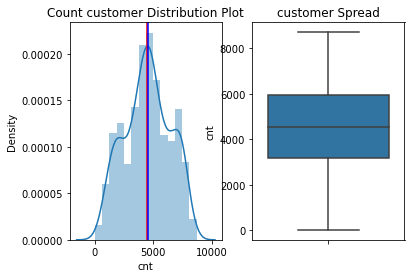

In [19]:
plt.subplot(1,2,1)
plt.title('Count customer Distribution Plot')
sns.distplot(df.cnt)
plt.axvline(df.cnt.mean(), color="r")
plt.axvline(df.cnt.median(), color="b")

plt.subplot(1,2,2)
plt.title('customer Spread')
sns.boxplot(y=df.cnt)


In [20]:
df['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

### Inference :
1. The plot seemed to be Normal Distribution
2. The Mean and Median is Equal.
3. The data points are not far spread out from the mean, 

## 3.1. Categorical Data

In [21]:
df.columns.to_list()

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

In [22]:
cat_df = df.iloc[:,:7]
cat_df.sample(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit
218,3,0,8,0,0,0,1
22,1,0,1,0,0,0,1


All are Categorical Columns

In [23]:
# Type casting
for item in cat_df:
    cat_df[item] = cat_df[item].astype('category')
    df[item] = cat_df[item].astype('category')
    
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
dtypes: category(7)
memory usage: 12.1 KB


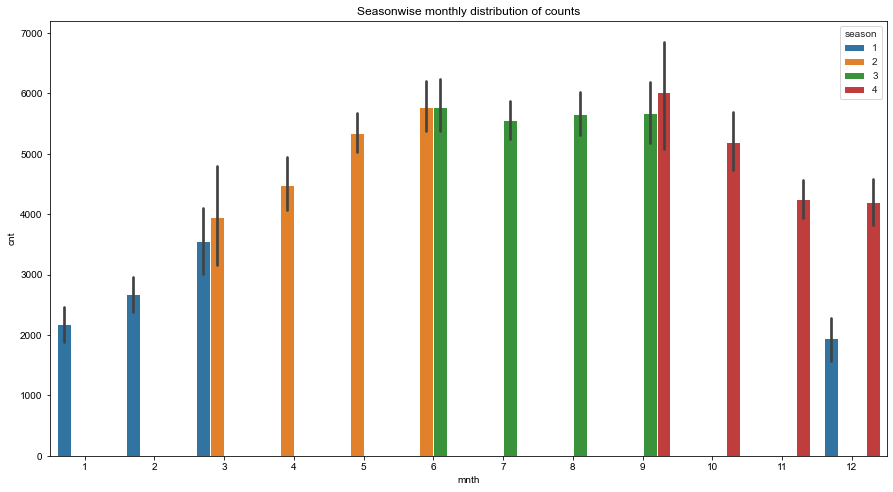

In [24]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')

#Bar plot of seasonvise monthly distribution of count
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

### Inference :
1. people rental more bikes in fall and less in spring season 
##### season 1-> spring season 2 -> summer season 3 -> winter season 4 -> fall

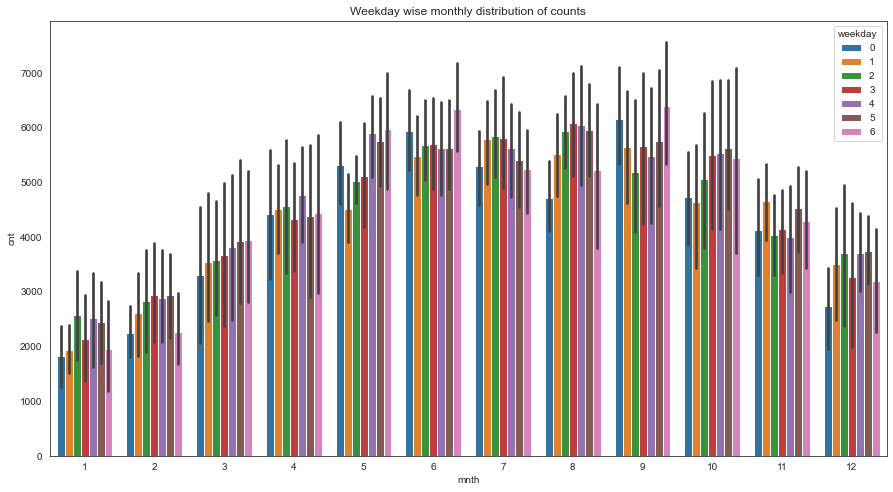

In [25]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','weekday']],hue='weekday',ax=ax)
ax.set_title('Weekday wise monthly distribution of counts')
plt.show()

### Inference :
1. The highest sales is done in 3Q and 2Q
2. customer are normally rent a bike in a week 

In [26]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Holiday wise distribution of counts

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

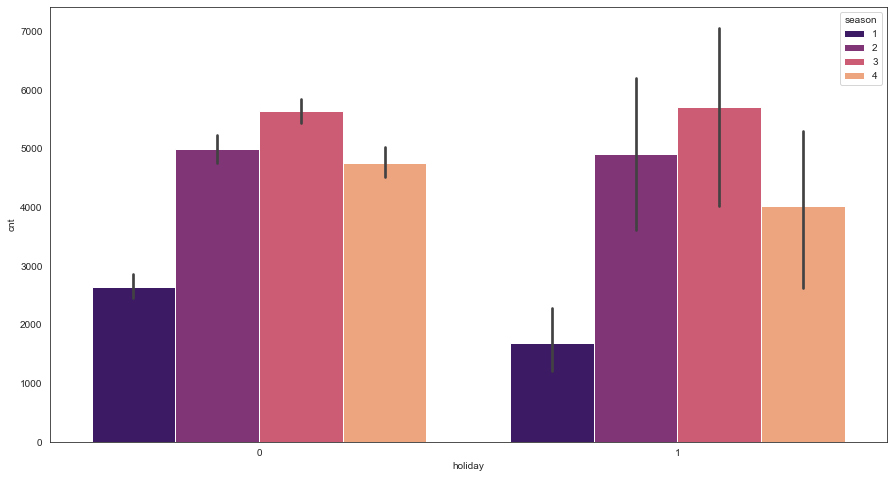

In [27]:
fig, ax= plt.subplots(figsize=(15,8))
# plot a barplot
sns.barplot(x='holiday',y='cnt',data=df[['holiday','cnt','season']],hue='season',ax=ax,palette=("magma"))



### Inference :
we can observed that during `no holiday` the bike rental counts is highest compared to during holiday for different seasons.
<!-- "\n" -->
Here, `0->No holiday, 1-> holiday`

In [28]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## weathersit wise distribution of counts

<AxesSubplot:title={'center':'weathersit'}, xlabel='weathersit', ylabel='cnt'>

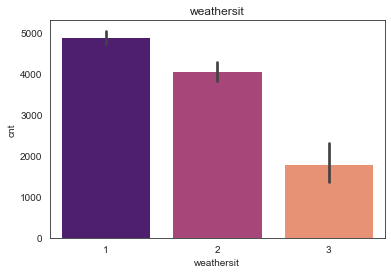

In [29]:
plt.title('weathersit')
sns.barplot(x= df['weathersit'],y=df['cnt'],palette=("magma"))

In [30]:
df.groupby(['weathersit'])['cnt'].sum()

weathersit
1    2257952
2     995024
3      37869
Name: cnt, dtype: int64

### Inference :
we can observed that during no {" `Clear, Few clouds, Partly cloudy, Partly cloudy `"} the bike rental counts is highest compared to during other weather's

## weekday wise distribution of counts

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

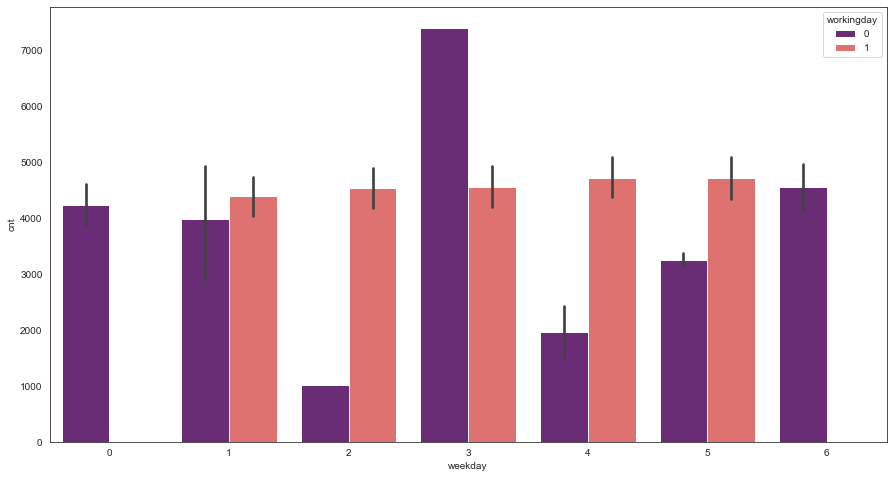

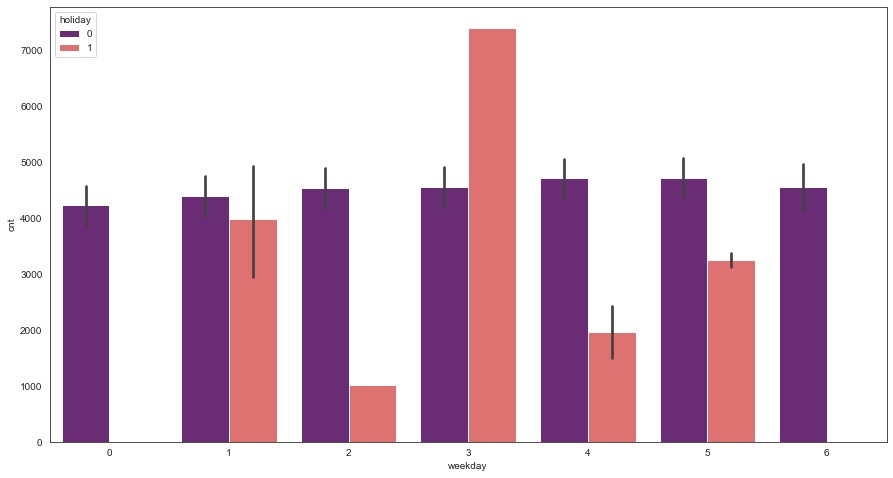

In [31]:
fig, ax = plt.subplots(figsize=(15,8))

# plot a barplot for weekday wise distribution of counts
sns.barplot(x='weekday',y='cnt',data=data[['weekday','cnt','workingday']],hue='workingday',ax=ax,palette=("magma")) #workingday


fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='weekday',y='cnt',data=df[['weekday','cnt','holiday']],hue='holiday',ax=ax,palette=("magma")) # holiday


In [32]:
print(df.groupby(['weathersit'])['cnt'].sum())
print('*'*80)
print(df.groupby(['holiday'])['cnt'].sum())
print('*'*80)
print(df.groupby(['workingday'])['cnt'].sum())


weathersit
1    2257952
2     995024
3      37869
Name: cnt, dtype: int64
********************************************************************************
holiday
0    3212410
1      78435
Name: cnt, dtype: int64
********************************************************************************
workingday
0    1000269
1    2290576
Name: cnt, dtype: int64


In [33]:
df = df.loc[(df['holiday'] != 0) | (df['workingday'] != 0)]
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510


In [34]:
print(df.groupby(['holiday'])['cnt'].sum())
print('*'*80)
print(df.groupby(['workingday'])['cnt'].sum())


holiday
0    2290576
1      78435
Name: cnt, dtype: int64
********************************************************************************
workingday
0      78435
1    2290576
Name: cnt, dtype: int64


### Inference : 
1. The `holiday` and the `working` day are representing same type of information so we drop one of them
2. customers are used more share bikes in `workingday` compare to `holiday`


In [35]:
df.drop(columns='workingday',inplace=True)


In [36]:
cat_df.drop(columns='workingday',inplace=True)

In [37]:
df.sample(2)

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
304,4,0,11,0,2,1,16.434153,19.8544,68.375,9.083257,4068
25,1,0,1,0,3,3,8.917500,10.1800,86.250,19.687950,506


In [38]:
cat_df.columns.to_list()

['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

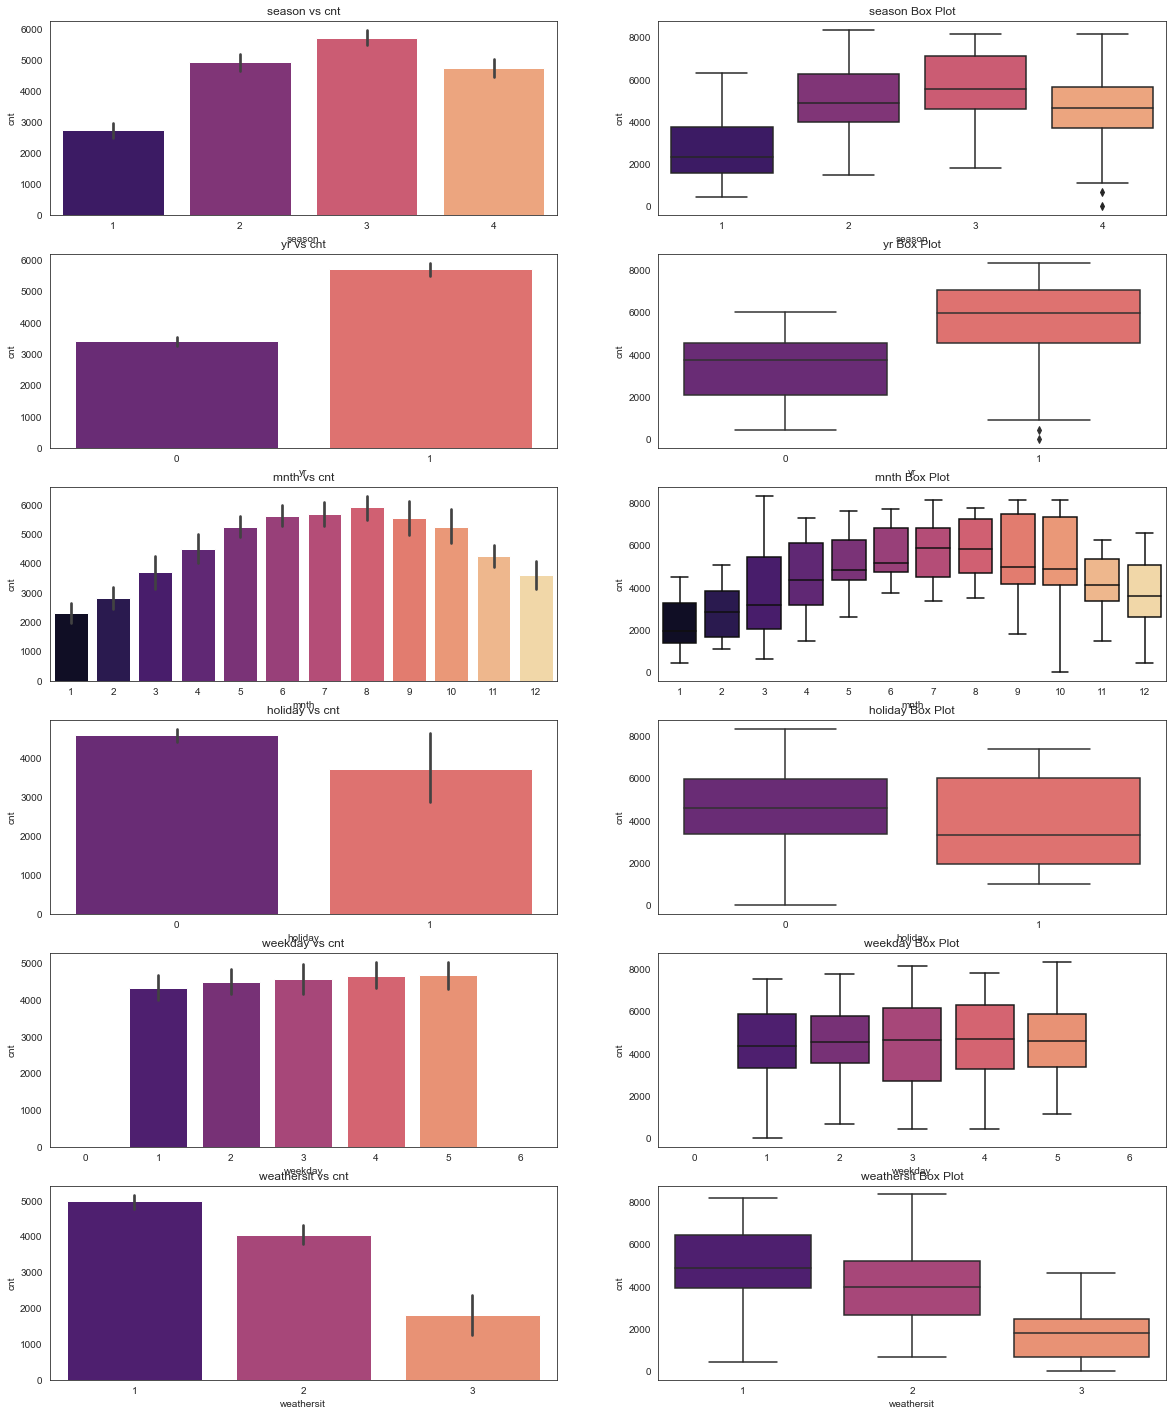

In [39]:
def plot_count(x,fig):
    plt.subplot(6,2,fig)
    sns.barplot(x=x, y='cnt', data=df,palette=("magma"))
    plt.title(f'{x} vs cnt')
    
    plt.subplot(6,2,fig+1)
    plt.title(f'{x} Box Plot')
    sns.boxplot(x = df[x], y=df['cnt'],palette=("magma"))
    
    
plt.figure(figsize=(20,25))
G_no =1
for i in cat_df.columns.to_list():
    plot_count(i,G_no)
    G_no+=2



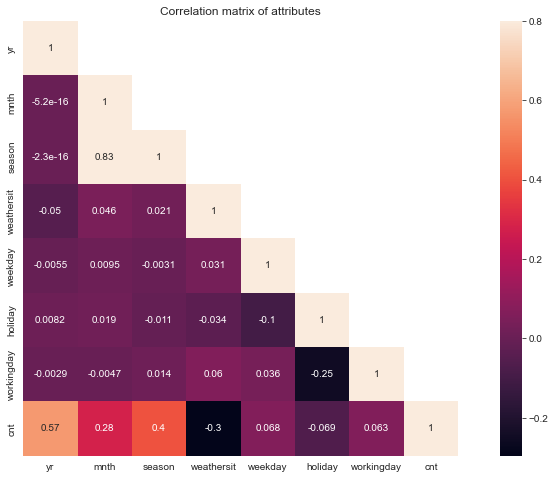

In [40]:
#Create the correlation matrix
correMtr=data[["yr","mnth","season","weathersit","weekday","holiday","workingday","cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

### Inference :
1. features are positively correlated or some are negatively correlated to each other.
2. The season and cnt are  positively correlated to each other, it means that both are carrying same information.

## Numerical Data

In [41]:
df.columns.to_list()

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

In [42]:
nu_df= df.iloc[:,6:]
nu_df.sample(3)

,temp,atemp,hum,windspeed,cnt
60,13.735000,16.00355,44.9583,20.624811,2134
17,8.883347,11.61665,86.1667,9.833925,683
216,29.144153,32.82835,63.0833,12.374632,4866


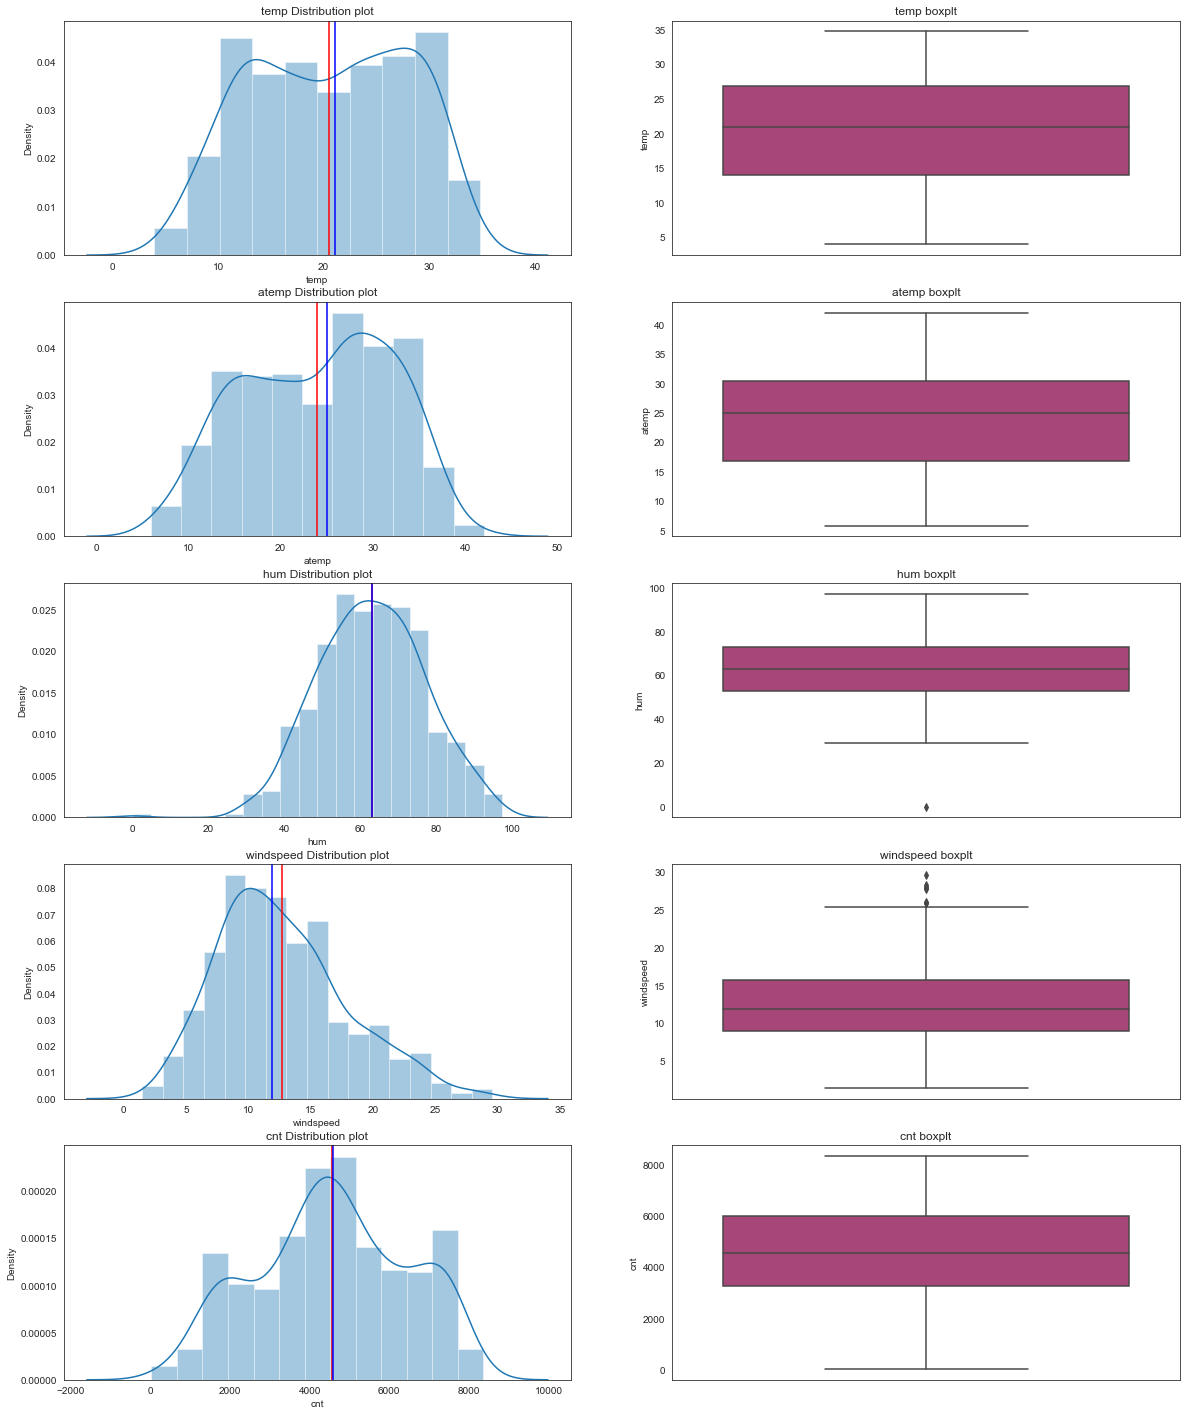

In [43]:
def plot_num(x,fig):
    plt.subplot(5,2,fig)
    plt.title(f'{x} Distribution plot')
    sns.distplot(df[x])
    plt.axvline(df[x].mean(),color='red')
    plt.axvline(df[x].median(),color='blue')
    
    plt.subplot(5,2,fig+1)
    plt.title(f'{x} boxplt')
    sns.boxplot(y=df[x],palette=("magma"))

    
plt.figure(figsize=(20,25))
gp_no = 1
for i in nu_df.columns.to_list():
    plot_num(i,gp_no)
    gp_no+=2

## Inference :
1. `temp` has bimodal distribution
2. `windspeed` is is right-skewed
3. `humidity` is normally distributed

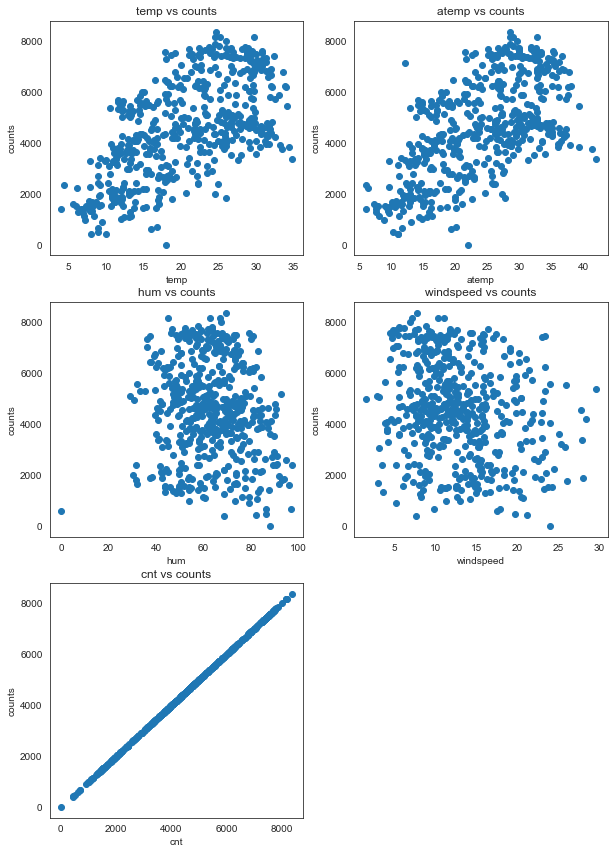

In [44]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['cnt'])
    plt.title(x+' vs counts')
    plt.ylabel('counts')
    plt.xlabel(x)

plt.figure(figsize=(10,25))
gp_no = 1
for i in nu_df.columns.to_list():
    scatter(i,gp_no)
    gp_no+=1

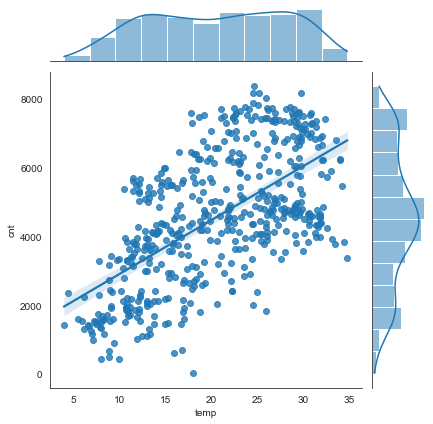

In [45]:
sns.jointplot(x= "temp", y='cnt', data=df, kind="reg")
plt.show()

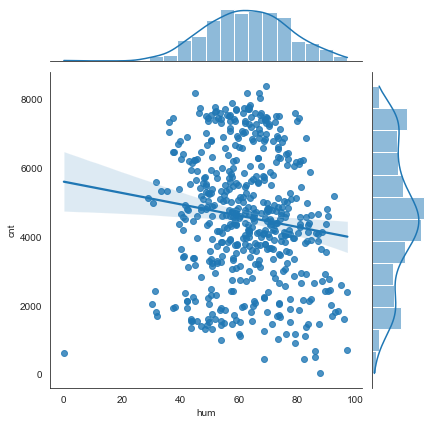

In [46]:
sns.jointplot(x= "hum", y='cnt', data=df, kind="reg")
plt.show()

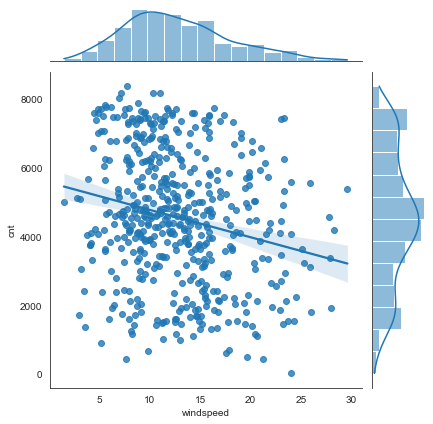

In [47]:
sns.jointplot(x= "windspeed", y='cnt', data=df, kind="reg")
plt.show()

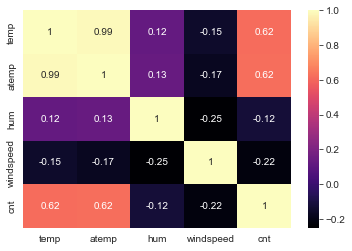

In [48]:
sns.heatmap(nu_df.corr(), cmap = 'magma', annot = True)
plt.show()

## Inference :
`temp` and `atemp` are highly correlated so we drop one of them to avoid multi-collinearity

In [49]:
df.drop(['atemp'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,1600
5,1,0,1,0,4,1,8.378268,51.8261,6.000868,1606
6,1,0,1,0,5,2,8.057402,49.8696,11.304642,1510


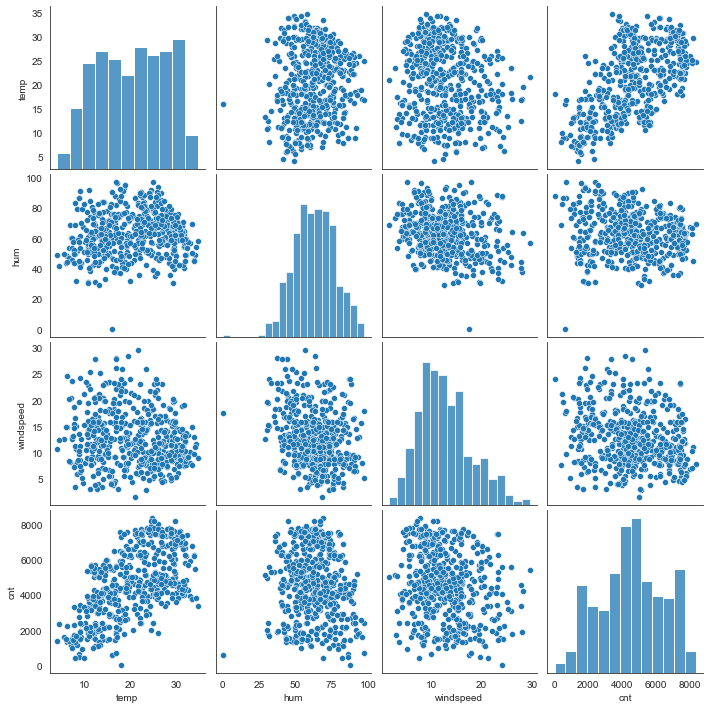

In [50]:
sns.pairplot(df)

In [51]:
df.shape

(520, 10)

In [56]:
nudf = nu_df.columns.to_list()
print(nudf)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [57]:
nudf.remove('atemp')

## Model Development

In [59]:
# Calculate the interquartile range (IQR) for each column
Q1 = df[nudf].quantile(0.25)
Q3 = df[nudf].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Remove rows with outliers
df = df[~((df[nudf] < (Q1 - threshold * IQR)) | (df[nudf] > (Q3 + threshold * IQR))).any(axis=1)]

In [60]:
df.shape

(511, 10)

we remove 9 rows

 ## Scaling the features

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[nudf] = scaler.fit_transform(df[nudf])

In [62]:
df.sample(3)

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
694,4,1,11,0,1,1,0.287561,0.359585,0.068196,0.607314
424,1,1,3,0,4,1,0.517273,0.476801,0.575164,0.595683
586,3,1,8,0,5,2,0.823555,0.623931,0.608410,0.691127


In [63]:
df.describe()

,temp,hum,windspeed,cnt
count,511.000000,511.000000,511.000000,511.000000
mean,0.538568,0.501958,0.460208,0.546078
std,0.243571,0.200812,0.204696,0.226556
min,0.000000,0.000000,0.000000,0.000000
25%,0.324183,0.362027,0.312937,0.394964
50%,0.555004,0.502442,0.430094,0.547122
75%,0.744766,0.644383,0.589174,0.721942
max,1.000000,1.000000,1.000000,1.000000


## One Hot encoding

In [64]:
cat_df = df.iloc[:,:6]
cat_cols = cat_df.columns.to_list()

In [65]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
2,0.131798,0.215785,0.635105,0.159113,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.136640,0.440198,0.387681,0.184652,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.172538,0.215322,0.462471,0.189209,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.142430,0.334448,0.188840,0.189928,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0.132009,0.305782,0.411379,0.178417,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [66]:
df.shape

(511, 28)

In [67]:
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [68]:
y = df.pop('cnt')
y.head()

2    0.159113
3    0.184652
4    0.189209
5    0.189928
6    0.178417
Name: cnt, dtype: float64

In [69]:
X = df
X.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
2,0.131798,0.215785,0.635105,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.136640,0.440198,0.387681,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.172538,0.215322,0.462471,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.142430,0.334448,0.188840,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0.132009,0.305782,0.411379,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [71]:
X_train.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
61,0.134420,0.041514,0.571698,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
86,0.222330,0.017837,0.533606,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
652,0.618258,0.611722,0.769280,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
116,0.695938,0.799146,0.814718,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
691,0.360803,0.408425,0.353173,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
y_train.head()

61     0.199400
86     0.240528
652    0.701799
116    0.461631
691    0.466187
Name: cnt, dtype: float64

In [73]:
X_train.shape

(408, 27)

In [74]:
X_test.shape

(103, 27)

In [75]:
y_train.shape

(408,)

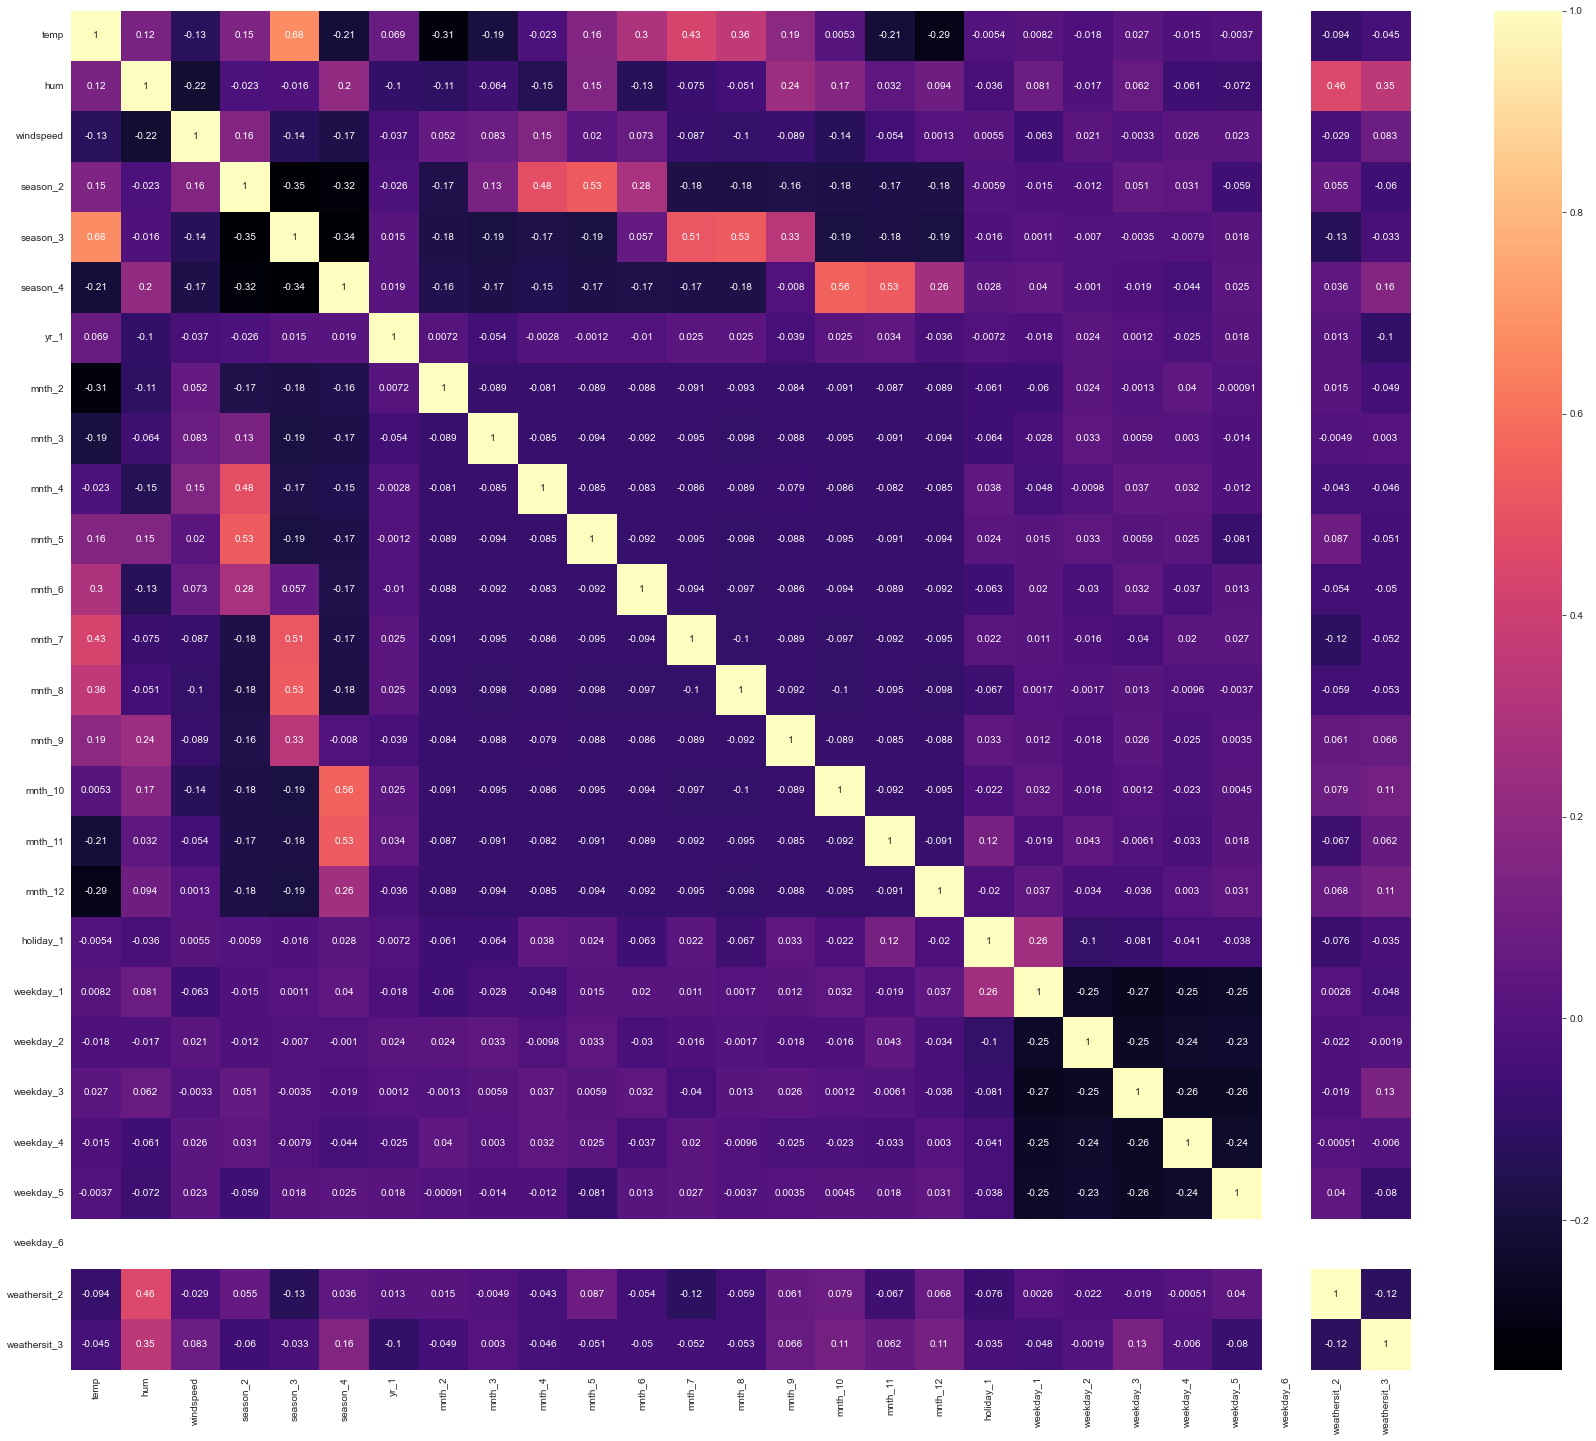

In [76]:
plt.figure(figsize = (30, 25))
sns.heatmap(X_train.corr(), annot = True, cmap="magma")
plt.show()

# RFE

#### Linear Regression Model

In [77]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [78]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator= lr, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [79]:
X_train.loc[:, rfe.support_].columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_12', 'holiday_1', 'weekday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 7),
 ('mnth_12', True, 1),
 ('holiday_1', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', False, 2),
 ('weekday_3', False, 4),
 ('weekday_4', False, 5),
 ('weekday_5', False, 6),
 ('weekday_6', False, 8),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [81]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,mnth_12,holiday_1,weekday_1,weathersit_2,weathersit_3
61,0.134420,0.041514,0.571698,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
86,0.222330,0.017837,0.533606,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
652,0.618258,0.611722,0.769280,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0
116,0.695938,0.799146,0.814718,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
691,0.360803,0.408425,0.353173,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [84]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     136.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.09e-161
Time:                        00:44:50   Log-Likelihood:                 454.32
No. Observations:                 408   AIC:                            -866.6
Df Residuals:                     387   BIC:                            -782.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2182      0.023      9.578   

mnth_2 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [85]:
X_train_new = X_train_new.drop(['mnth_2'], axis = 1)

### Model 2

In [86]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     143.6
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.64e-162
Time:                        00:44:55   Log-Likelihood:                 453.87
No. Observations:                 408   AIC:                            -867.7
Df Residuals:                     388   BIC:                            -787.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2262      0.021     10.734   

mnth_4 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [87]:
X_train_new = X_train_new.drop(['mnth_4'],axis=1)

### Model 3

In [88]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     151.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.69e-163
Time:                        00:44:59   Log-Likelihood:                 453.61
No. Observations:                 408   AIC:                            -869.2
Df Residuals:                     389   BIC:                            -793.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2274      0.021     10.826   

mnth_6 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [89]:
X_train_new = X_train_new.drop(['mnth_6'],axis=1)

### Model 4

In [90]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     160.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.52e-164
Time:                        00:45:03   Log-Likelihood:                 453.41
No. Observations:                 408   AIC:                            -870.8
Df Residuals:                     390   BIC:                            -798.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2268      0.021     10.818   

mnth_12 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [91]:
X_train_new = X_train_new.drop(['mnth_12'],axis=1)

### Model 5

In [92]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          5.37e-165
Time:                        00:45:08   Log-Likelihood:                 452.32
No. Observations:                 408   AIC:                            -870.6
Df Residuals:                     391   BIC:                            -802.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2301      0.021     11.029   

mnth_3 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [93]:
X_train_new = X_train_new.drop(['mnth_3'],axis=1)

### Model 6

In [94]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     180.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.68e-165
Time:                        00:45:15   Log-Likelihood:                 450.79
No. Observations:                 408   AIC:                            -869.6
Df Residuals:                     392   BIC:                            -805.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2359      0.021     11.429   

mnth_5 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [95]:
X_train_new = X_train_new.drop(['mnth_5'],axis=1)

### Model 7

In [96]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     192.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          3.51e-166
Time:                        00:45:19   Log-Likelihood:                 449.66
No. Observations:                 408   AIC:                            -869.3
Df Residuals:                     393   BIC:                            -809.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2312      0.020     11.319   

weekday_1 seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [97]:
X_train_new = X_train_new.drop(['weekday_1'],axis=1)

### Model 8

In [98]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     207.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          6.29e-167
Time:                        00:45:23   Log-Likelihood:                 448.65
No. Observations:                 408   AIC:                            -869.3
Df Residuals:                     394   BIC:                            -813.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2297      0.020     11.246   

In [99]:
checkVIF(X_train_new)

,Features,VIF
0,const,25.31
5,season_3,6.13
1,temp,3.81
4,season_2,2.79
6,season_4,2.25
2,hum,2.06
10,mnth_10,1.60
8,mnth_8,1.57
12,weathersit_2,1.57
13,weathersit_3,1.41


In [100]:
X_train_new = X_train_new.drop(['season_3'], axis = 1)

### Model 9

In [101]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     215.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          4.48e-165
Time:                        00:45:29   Log-Likelihood:                 441.40
No. Observations:                 408   AIC:                            -856.8
Df Residuals:                     395   BIC:                            -804.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2277      0.021     10.972   

In [102]:
checkVIF(X_train_new)

,Features,VIF
0,const,25.29
2,hum,2.00
5,season_4,1.78
11,weathersit_2,1.57
9,mnth_10,1.55
1,temp,1.51
7,mnth_8,1.39
12,weathersit_3,1.39
4,season_2,1.37
8,mnth_9,1.25


### Residual Analysis of Model

In [103]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

In [104]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     215.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          4.48e-165
Time:                        00:45:33   Log-Likelihood:                 441.40
No. Observations:                 408   AIC:                            -856.8
Df Residuals:                     395   BIC:                            -804.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2277      0.021     10.972      0.000       0.187       0.269
temp             0.5082      0.021     24.550      0.000       0.468       0.549
hum             -0.1492      0.029     -5.131      0.000      -0.206      -0.092
windspeed       -0.1111      0.022     -5.098      0.000      -0.154      -0.068
season_2         0.0885      0.011      7.908      0.000       0.066       0.110
season_4         0.1302      0.013     10.079      0.000       0.105       0.156
yr_1             0.2450      0.008     29.150      0.000       0.228       0.262
mnth_8           0.0685      0.017      4.092      0.000       0.036       0.101
mnth_9           0.1015      0.017      5.831      0.000       0.067       0.136
mnth_10          0.0620      0.018      3.421      0.001       0.026       0.098
holiday_1       -0.0867      0.021     -4.161      0.000      -0.128      -0.046
weathersit_2    -0.0453      0.011     -4.180      0.000      -0.067      -0.024
weathersit_3    -0.2534      0.030     -8.432      0.000      -0.312      -0.194
==============================================================================
Omnibus:                       62.008   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.861
Skew:                          -0.733   Prob(JB):                     1.59e-36
Kurtosis:                       5.747   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
resd = pd.DataFrame(zip(y_train, y_train_price),columns = ['Actual', 'Predicted'])
resd['Residuals'] = resd['Actual'] - resd['Predicted']
resd.head()

,Actual,Predicted,Residuals
0,0.199400,0.226314,-0.026913
1,0.240528,0.367211,-0.126684
2,0.701799,0.757069,-0.055270
3,0.461631,0.414756,0.046875
4,0.466187,0.686090,-0.219903


In [106]:
np.mean(resd['Residuals'])

-6.837531630212898e-16

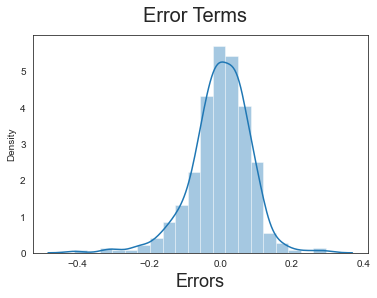

In [107]:
fig = plt.figure()
sns.distplot(resd['Residuals'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

###  Prediction and Evaluation

In [108]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [109]:
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [110]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7979079578910019

Text(0, 0.5, 'y_pred')

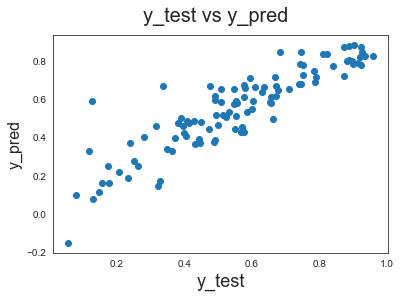

In [111]:
# EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [112]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     215.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          4.48e-165
Time:                        00:45:45   Log-Likelihood:                 441.40
No. Observations:                 408   AIC:                            -856.8
Df Residuals:                     395   BIC:                            -804.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2277      0.021     10.972      0.000       0.187       0.269
temp             0.5082      0.021     24.550      0.000       0.468       0.549
hum             -0.1492      0.029     -5.131      0.000      -0.206      -0.092
windspeed       -0.1111      0.022     -5.098      0.000      -0.154      -0.068
season_2         0.0885      0.011      7.908      0.000       0.066       0.110
season_4         0.1302      0.013     10.079      0.000       0.105       0.156
yr_1             0.2450      0.008     29.150      0.000       0.228       0.262
mnth_8           0.0685      0.017      4.092      0.000       0.036       0.101
mnth_9           0.1015      0.017      5.831      0.000       0.067       0.136
mnth_10          0.0620      0.018      3.421      0.001       0.026       0.098
holiday_1       -0.0867      0.021     -4.161      0.000      -0.128      -0.046
weathersit_2    -0.0453      0.011     -4.180      0.000      -0.067      -0.024
weathersit_3    -0.2534      0.030     -8.432      0.000      -0.312      -0.194
==============================================================================
Omnibus:                       62.008   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.861
Skew:                          -0.733   Prob(JB):                     1.59e-36
Kurtosis:                       5.747   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""